# Tables - General Covid-19 dataset

## Tweets Visualization

We've used the following packages to create a table showing the tweets and the relative tweets links:

In [ ]:
import pandas as pd
import json
from dateutil.parser import parse
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_table
import re
from jupyter_dash import JupyterDash
from urllib.parse import urlparse
from collections import Counter
import csv
from IPython.core.display import Image, display

We've defined a function to remove URLs from the tweet's text:

In [ ]:
def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

To read the JSON file that has all the tweets, it is necessary to do:

In [ ]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We're interested in the "created_at", "full_text" and "id_str" fields:

In [ ]:
index= 0

date = []
txt = []
link = []

for element in data:
    token=data[index]['created_at']
    d = parse(token)
    d = d.strftime('%Y/%m/%d')
    date.append(d)
    
    txt.append(remove_urls(data[index]['full_text']))
    link.append("[http://twitter.com/anyuser/status/"+data[index]['id_str']+"](http://twitter.com/anyuser/status/"+data[index]['id_str']+")")
    
    index=index+1

We create the Pandas DataFrame and then we work on it in order to create the table:

In [ ]:
df = pd.DataFrame(
    {'Date': date,
    'Tweet': txt,
     'Link': link
    })

In order to create the table, we've used the Dash module, that allows to generate an interactive table.

In [ ]:
app = JupyterDash(__name__)
#https://dash.plotly.com/datatable/filtering
app.layout = html.Div([
    dash_table.DataTable(
        id='datatable-interactivity',
        columns=[
            {'name': 'Date', 'id': 'Date'},
            {'name': 'Tweet', 'id': 'Tweet'},
            {'name': 'Link', 'id':'Link', 'type': 'text', 'presentation':'markdown'}],
        data=df.to_dict('records'),
        style_filter={
            "backgroundColor":"white"
        },
        style_data_conditional=[
        {
            'if': {
                'column_id': 'Date',
            },
            'width':'200px'
        },
        {
            'if': {
                'column_id': 'Tweet',
            },
            'width':'2500px'
        },
        {
            'if': {
                'column_id': 'Link',
            },
            'font-size':'16px'
        }],
        style_cell={
            'textAlign':'left',
            'font-family': 'Helvetica Neue',
            'whiteSpace': 'normal',
            'padding-bottom': '15px',
            'border':'0px solid darkslategray',
            'font-size':'16px',
            'height': 'auto'
        },
        style_header={
            'backgroundColor':"#FBFBB8",
            'font-family':'Helvetica Neue',
            'font-weight': 'bold',
            'whiteSpace': 'normal',
            'padding': '10px',
            'border-bottom':'1px solid darkslategray',
            'font-size':'18px',
            'height': 'auto'
        },
        style_data={
            'whiteSpace': 'normal',
            'height': 'auto'
        },
        filter_action="native",
        sort_action="native",
        sort_mode="multi",
        page_action="native",
        page_current= 0,
        page_size= 8,
        fill_width=False
    ),
    html.Div(id='datatable-interactivity-container')
])

app.run_server(port=7771)

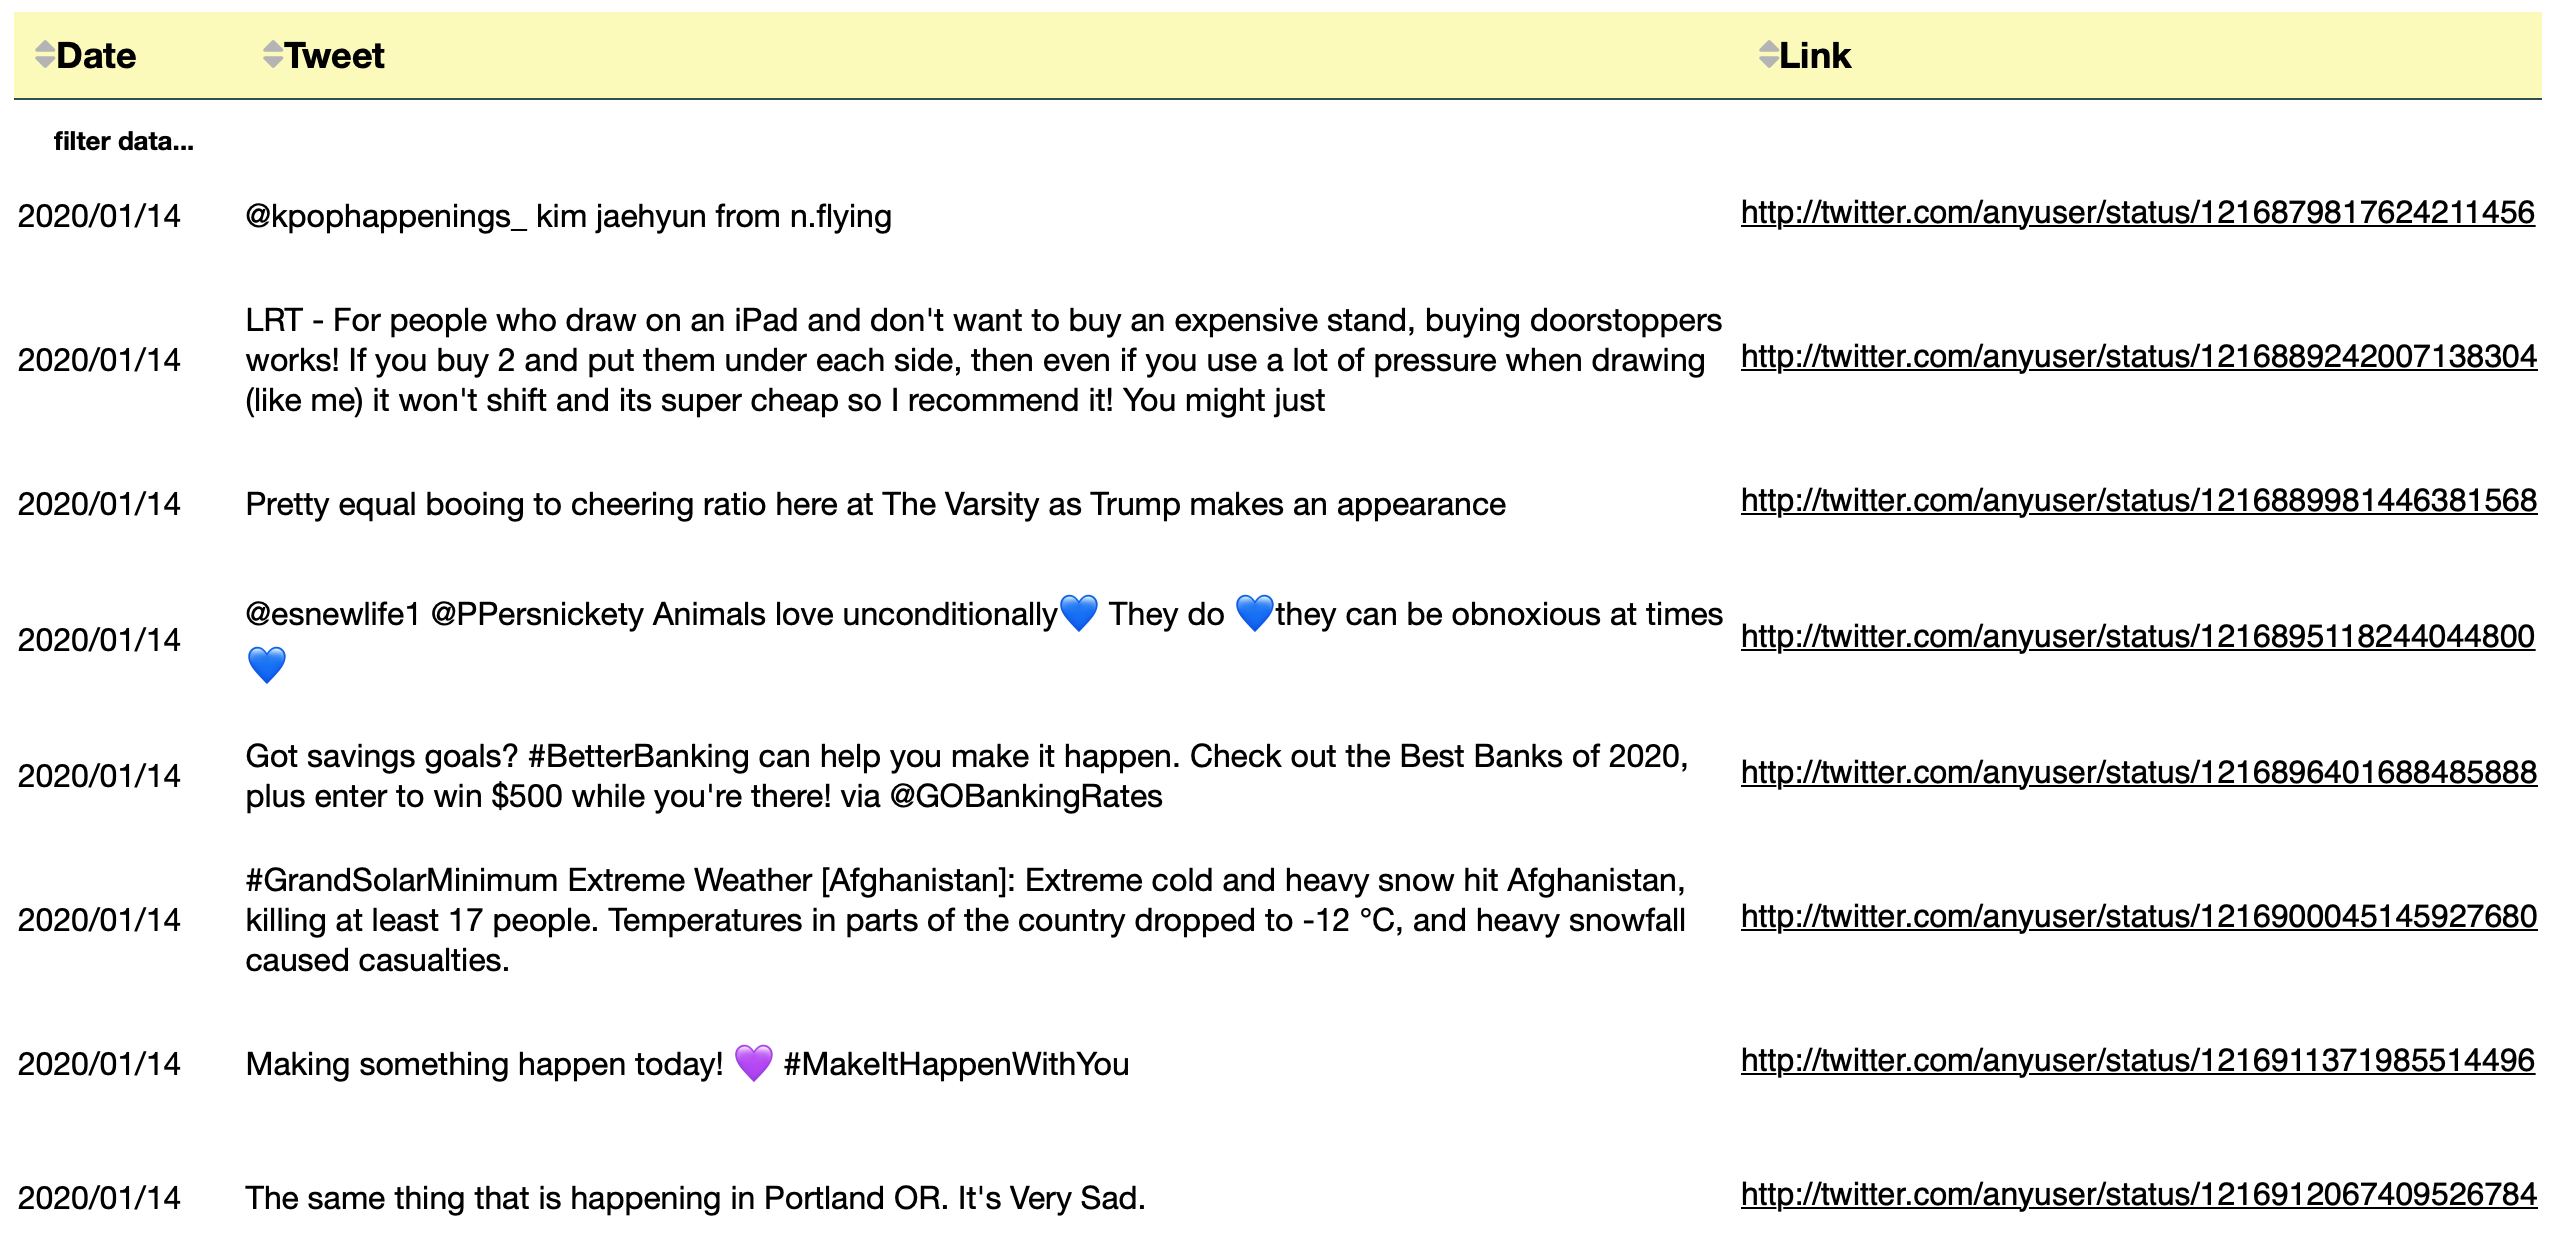

## Domains shared in the tweets

For the general dataset we have chosen to visualize just the domains in order to have, indeed, a general point of view on the links shared in the tweets. We thought that in this case an a table visualisation of all the URLs was unnecessary because in this case there is no need to analyze the URLs linked to misinformations. The domains here are enough. 
We have considered just the domains that are external to "twitter.com".

In [ ]:
index=0
domains = []
for element in data:
    #print(index)
    if data[index]['entities']['urls'] is not None:
        for entity in data[index]['entities']['urls']:
            domain = urlparse(entity['expanded_url'].lower()).netloc
            if domain!="twitter.com":
                domains.append("["+domain+"]"+"(http://"+domain+")") #wrap with http:// needed to make the link work
    
    #print(" ")
    index=index+1

count = Counter(domains)
df_d = pd.DataFrame.from_dict(count, orient='index').reset_index()
df_d = df_d.rename(columns={'index':'Domain', 0:'Count'})
df_d = df_d.sort_values(by=['Count'], ascending=False)

The result is saved on a csv for a more detailed consultation if you need to.

In [ ]:
df.to_csv('dataset/domains_general.csv', sep=';', index=False)

In [ ]:
app = JupyterDash(__name__)
#https://dash.plotly.com/datatable/filtering
app.layout = html.Div([
    dash_table.DataTable(
        id='datatable-domain',
        columns=[
            {'name': 'Domain', 'id':'Domain', 'type': 'text', 'presentation':'markdown'},
            {'name': 'Count', 'id': 'Count'}],
        data=df_d.to_dict('records'),
        style_data_conditional=[{
            'if': {
                'column_id': 'Count',
            },
            'text-align':'right',
            'width':'120px'
        },
        {
            'if': {
                'column_id': 'Domain',
            },
            'text-align':'left',
            'width':'180px'
        }],
        style_header_conditional=[{
            'if': {
                'column_id': 'Count',
            },
            'text-align':'right',
            'width':'120px'
        },
        {
            'if': {
                'column_id': 'Domain',
            },
            'text-align':'left',
            'width':'180px'
        }],
        style_filter={
            "backgroundColor":"white"
        },
        style_cell={
            'font-family': 'Helvetica Neue',
            'border':'0px solid darkslategray',
            'font-size':'16px',
        },
        style_header={
            'backgroundColor':"#FBFBB8", #moccasin
            'font-family':'Helvetica Neue',
            'font-weight': 'bold',
            'border-bottom':'1px solid darkslategray',
            'font-size':'18px',
            'padding':'5px'
        },
        filter_action="native",
        sort_action="native",
        sort_mode="multi",
        page_action="native",
        page_current= 0,
        page_size= 8,
        fill_width=False
    ),
    html.Div(id='datatable-domain-container')
])

app.run_server(mode="inline",port=7772)

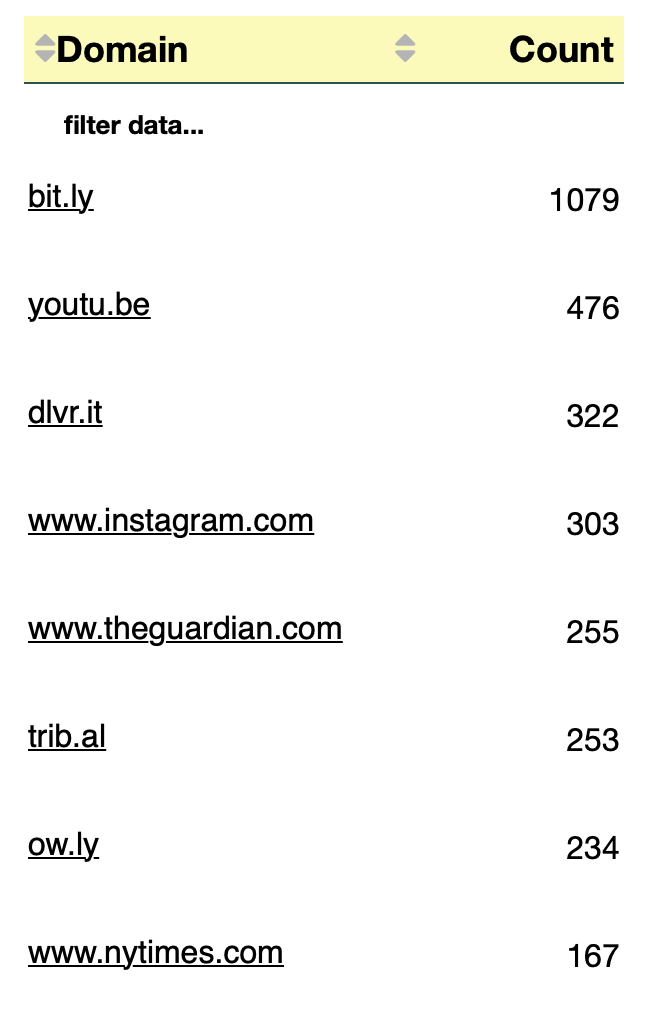